In [2]:
import json
import pandas as pd
with open('./Data/all.json') as json_file:
    alldata = json.load(json_file)

In [3]:
lists = [x for x in alldata if isinstance(x, list)]
geometries = [[i['geometry'] for i in lists[k]] for k in range(len(lists))] # replace range(len(x)) ?
geometries = [[pd.DataFrame(i) for i in geometries[j]] for j in range(len(geometries))] # replace range(len(x)) ?
# https://docs.python.org/2.3/whatsnew/section-enumerate.html 

In [4]:
geometries2 = pd.concat([pd.concat([item.assign(
    segment = i) for i, item in enumerate(item2)]).assign(
    village = h) for h, item2 in enumerate(geometries)])

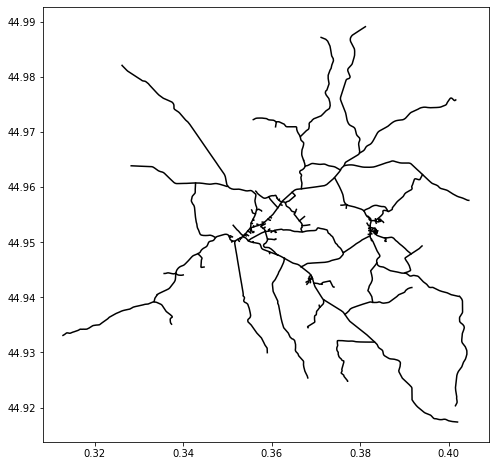

In [108]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8,8)
def mapall(index) :
    for k in range(len(geometries[index])) :
        plt.plot(geometries[index][k]['lon'],
                 geometries[index][k]['lat'],
                color = "black")
mapall(1)

In [162]:
import isect
# example
test1 = ((1,1),(0,0))
test2 = ((0,1),(1,0))
test = isect.isect_segments([test1,test2])
print(test)
# test

[(0.5, 0.5)]


In [6]:
import numpy as np
import itertools
geometries3 = geometries2.assign(tuples = [tuple(x) for x in geometries2[['lat','lon']].to_numpy()])

In [21]:
testvillage = geometries3[geometries3['village'] == 0]
combin = list(itertools.combinations(testvillage['tuples'],2)) # list defeats the purpose of using iterator
# works for one village but crashes when tested on all villages
len(combin)

510555

In [ ]:
# trying networkx
import networkx as nx
test = nx.Graph()
for i in range(len(geometries[1][1])) :
    test.add_node(i,pos=(geometries[1][1]['lat'][i],geometries[1][1]['lon'][i]))
e1 = zip(range(0,i),range(1,i+1))
for j in range(len(geometries[1][2])) :
    test.add_node(j+i+1,pos=(geometries[1][2]['lat'][j],geometries[1][2]['lon'][j]))
e2 = zip(range(i+1,j+i+1),range(i+2,j+i+2))
test.add_edges_from(list(e1))
test.add_edges_from(list(e2))
nx.draw(test, nx.get_node_attributes(test,'pos'), node_size = 10)